HADM 5120 : Spring Final Project

'''

Objective: This Final Project explore diabetes occurrence and cases in the state of Illinois and will determine who or what groups of people may be at greater risk for complications

There are 3 datasets used, each of different data types from both Kaggle.com and the CDC Diabetes database

The following report includes visualizations to aid interpretation of data, constraints, & final conclusions.

'''

In [271]:
import json
import pandas as pd
import matplotlib.pyplot as plt

hospitalizations = pd.read_csv('Hospitalizations_Hyper.csv')

deaths = pd.read_excel('Deaths by Age and Sex.xlsx')

diabetes = pd.read_json('diabetes_predictor.json')


def renameDF(dataframe, original, newname):
    return dataframe.rename(columns = {original: newname})
'''
This funtion will take in dataframe name, original column name, and new intended column name and change it to the 
new column name wanted for a better ease of understandng column description.

>>> dataframe.rename(columns = {'A much longer than needed name for title': 'Title'})
df['Title']

'''

def formatDataFrames(dataframe, column):
    return dataframe[column].astype(int)
'''
This funtion converts all contents of a column from string, etc. into a integer which can be used later to be aggregated
much more easily. 

>>> dataframe['Data'].astype(int)
df['Data']

'''
    
def dfPrintHead(dataframe):
    print (dataframe.head())
'''
This funtion will return the first five rows worth of information will can allow us to check whether previous commands
and funtions have returned intended items.

>>> print (dataframe.head())
"First few rows presented"

'''
    

'\n\n\n\n'

In [288]:
data = [diabetes['Glucose'], diabetes['Outcome']]
headers = ['Glucose', 'Outcome']
df_1 = pd.concat(data, axis=1, keys=headers)

df_1 = df1.groupby(['Glucose', 'Outcome'], as_index=False)['Outcome'].sum()
df_1 = df1[df1.Outcome != 0]

## In order to get rid out the "zero" outcome which is a reference to diabetes not occurring, I had to research how to remove 0 values
## but keep everything else and the ! capability of python was referenced to on python documentation on python.org. This worked well to
## remove 0 related values and allow only values for diabetes occurrence to show


df_1

## Experienced difficulty extracting data from json file for intended columns and rows using groupby funtion and do
## appropriate aggregations. Hence I chose to construct dataframe from scatch and using concat to join them to do 
## desired manipulations.

,Glucose,Outcome
1,0,6
20,80,3
25,84,3
27,85,2
31,88,3
...,...,...
209,195,8
210,196,5
212,197,6
213,198,2


In [273]:
print(3 != 3)
print(3 == 3)
print(2 != 3)

False
True
True


In [ ]:
## This is my small test and method for me to see and check my understanding if I know what the !='#' is or not.

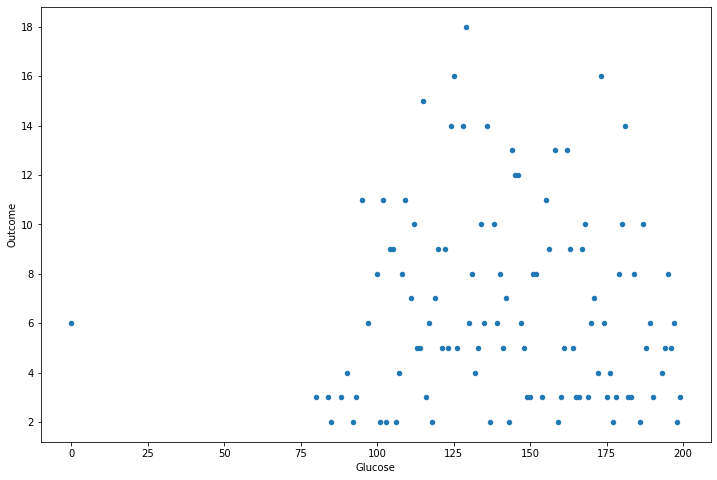

In [274]:
fig, ax = plt.subplots(figsize=(12,8))


df_1.plot(kind = 'scatter', x='Glucose', y='Outcome', ax=ax)


This graph shows in the state of Illinois, the cases of diabetes that are diagnosed are greater in quantity of Hyperglycemic type. Hyperglycemia is considered to be glucose levels above the level of 125. 

In [277]:
data = [diabetes['Age'], diabetes['Outcome']]
headers = ['Age', 'Outcome']
df_1 = pd.concat(data, axis=1, keys=headers)

df_1 = df_1.groupby(['Age', 'Outcome'], as_index=False)['Outcome'].sum()
df_1 = df_1[df_1.Outcome != 0]

## In order to get rid out the "zero" outcome which is a refrence to diabetes not occuring, I had to research how to remove 0 values
## but keep everything else and the ! capability of python was refrenced to on python documenation on python.org. This worked well to
## remove 0 related values and allow only values for diabetes occurance to show

df_1

## Same issue as mentioned above, 
## Hence I chose to construct dataframe from scatch and using concat to join them to do 
## desired manipulations.

,Age,Outcome
1,21,12
3,22,31
5,23,18
7,24,22
9,25,38
11,26,18
13,27,21
15,28,25
17,29,31
19,30,18


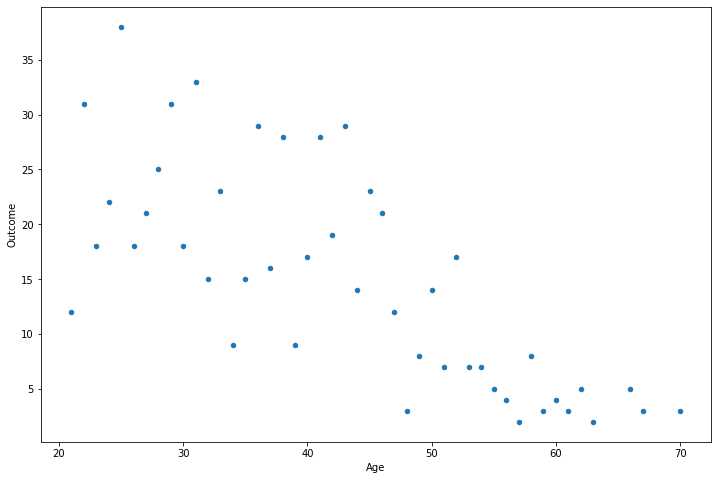

In [278]:
fig, ax = plt.subplots(figsize=(12,8))


df_1.plot(kind = 'scatter', x="Age", y="Outcome", ax=ax)

This graph is very interesting because it allows us to see that a greater number of younger individuals below the age of 40 are those getting diagnosed with Hyperglycemia. In this particular dataset the greatest number of diagnoses are occurring in young adults 20-30 years of age. This is not exactly what one would have traditionally expected to see



In [279]:
hospitalizations_1 = hospitalizations.fillna(0)

hospitalizations_2 = hospitalizations_1.drop(0)

hospitalizations_3 = hospitalizations_2.drop(1)

df_2 = pd.DataFrame(hospitalizations_3)

df_2 = renameDF(df_2, 'Hyperosmolar Hyperglycemic Nonketotic Syndrome as First-Listed Diagnosis', 'Hyperglycemic')

df_2['Hyperglycemic'] = formatDataFrames(df_2, 'Hyperglycemic')

dfPrintHead(df_2)


       Sex Age Group (in years)  Hyperglycemic Unnamed: 3 Unnamed: 4  \
2  Overall                18-44            178        1.5        0.9   
3        0                45-64            375        0.9        0.7   
4        0                  65+            263        0.6        0.5   
5        0                Total            816        0.8        0.7   
6    Males                18-44            113        2.5        1.1   

  Unnamed: 5  Unnamed: 6  
2        2.1         0.0  
3        1.0         0.0  
4        0.7         0.0  
5        0.9         0.0  
6        3.8         0.0  


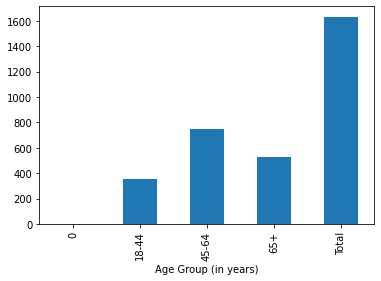

In [280]:
df_2.groupby(['Age Group (in years)'])['Hyperglycemic'].agg(sum).plot.bar()

This graph breaks down the number of cases of Hyperglycemic individuals by certain age groups who become hospitalized. This is quite interesting because here we can see those in the 18-44 age group do not end up hospitalized despite them being the highest number of Hyperglycemic patients, which is one of the most dangerous health groups to be in. An interesting result

In [281]:
part1 = df_2.groupby(['Age Group (in years)'])['Hyperglycemic'].agg(sum)

In [282]:
deaths_2 = deaths.fillna(0)

deaths_3 = deaths_2.drop(0)
deaths_4 = deaths_3.drop(5)

df_3 = pd.DataFrame(deaths_4)

df_3.replace(',','', regex=True, inplace=True)

## This code is very important to have because as I went to covert this column into int values it gave me a error, 
## because the "," was not being read in. I researched further this issue and found a computer cannot understand a 
## comma as a number or a value. Therefore I had to do some research to find and construct this code to ignore the 
## comma and have the column be understood as integers.

df_3 = renameDF(df_3, 'Number of Deaths with Diabetes as Underlying Cause of Death (UCD) in Persons, Aged 15 Years or Older, Illinois, 2013', 'Diabetes Deaths')

df_3['Unnamed: 1'] = formatDataFrames(df_3, 'Unnamed: 1')

dfPrintHead(df_3)



  Diabetes Deaths  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
1           15-44         105         0.0         0.0         0.0         0.0
2           45-64         694         0.0         0.0         0.0         0.0
3           65-74         601         0.0         0.0         0.0         0.0
4             75+        1396         0.0         0.0         0.0         0.0


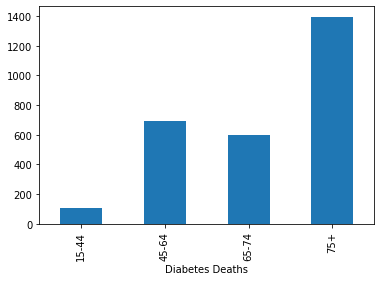

In [283]:
df_3.groupby(['Diabetes Deaths'])['Unnamed: 1'].agg(sum).plot.bar()

This graph is done with downloaded version of data for diabetes related deaths in certain age groups for the same hospitalized patients. The same discrepancy mentioned and seen on the previous graph is further grown in the deaths circumstance. The deaths for those in middle age, 45-64 has further risen and is higher than that of those in the younger age group. 

In [285]:
import requests
import pandas as pd
headers = {
  'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="90", "Google Chrome";v="90"',
  'sec-ch-ua-mobile': '?0',
  'Upgrade-Insecure-Requests': '1',
  'Origin': 'https://nccd.cdc.gov',
  'Content-Type': 'application/x-www-form-urlencoded',
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36',
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
  'Sec-Fetch-Site': 'same-origin',
  'Sec-Fetch-Mode': 'navigate',
  'Sec-Fetch-User': '?1',
  'Sec-Fetch-Dest': 'document',
  'Referer': 'https://nccd.cdc.gov/Toolkit/DiabetesBurden/Mortality/DiabetesCauseDeath',
  'Accept-Language': 'en-US,en;q=0.9'
}
state = 'ddlSelectedState=Illinois'
result = requests.post('https://nccd.cdc.gov/Toolkit/DiabetesBurden/Mortality/DiabetesCauseDeath', data=state, headers=headers)
if result.status_code == 200:
    tables = pd.read_html(result.text)
else:
    print(result.status_code)

tables[2]

df_int = pd.DataFrame(tables[2])

df_int = renameDF(df_int, 'Number of DeathsReports the number of deaths with diabetes as the underlying cause of death.', 'Number of Deaths')

df_int['Number of Deaths'] = formatDataFrames(df_int, 'Number of Deaths')


dfPrintHead(df_int)



  Age Group  Number of Deaths
0     15-44               105
1     45-64               694
2     65-74               601
3       75+              1396
4     Total              2796


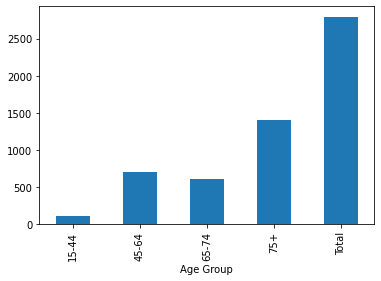

In [252]:
df_int.groupby(['Age Group'])['Number of Deaths'].agg(sum).plot.bar()

This graph is the same as the previous graph except this one come directly from the internet and was done by parsing HTML and read in using pandas and the previously mentioned functions as well. The graph shows same results and includes a total column. 

In [253]:
part2 = df_int.groupby(['Age Group'])['Number of Deaths'].agg(sum)

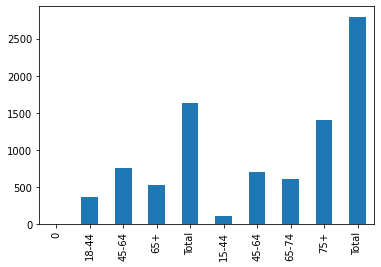

In [270]:
frames = [part1, part2]

result = pd.concat(frames)

result.plot.bar()

This merge and graphing analysis displays the overall hospitalization vs death rate. The hosptitalization of those in the 75+ catagory look to be in the most dangerous age catagory for Hyperglycemic health conditions. The graph shows that recovery from the hosptial seems much more unlikey for the elders when compared to the younger groups

'''
Some constraints with this analysis and project have been "field level transformations". I performed 4 field level transformations and
only performed those because doing anymore would be redundant and unnecessary and would not serve anymore purpose to the project.

Another constraint I faced was performing additional merges. For my particular data and purpose I was attempting to achieve it did not
make sense to perform additional merges and gain further insight.

'''

'''
Some large conclusions that can be drawn from these analyses and graphs are the following:

Glucose levels are a great predictor for testing whether someone gets diabetes or not. From a further analysis we are able to 
learn age can also play a factor in the level of prevalence of diabetes. The outcomes of diabetes for these patients shows that a 
great number of them have Hyperglycemia. We also learned that Hyperglycemic cases were greatest among the younger groups of patients
below the age of 40. 

From there, hospitalization among certain age groups was graphed and analyzed to further to see what happen once the Hyperglycemic
condition worsens. We see the older age group become hospitalized more compared to the younger Hyperglycemic patients. 

A death analysis was also performed to further see what the end result of Hyperglycemic patients is. The death is higher for older 
patients which can align to a prediction made for that outcome. 

As a conclusion we have gained insight onto the Hyperglycemic patient population of Illinois and how different age-groups can have 
drastically different outcome in hospitalization rates and death rates. Despite the younger age groups developing Hyperglycemia in 
greater numbers this does not reflect results of death. We can conclude those in age groups greater than 40 are in greatest risk for
Hyperglycemic related deaths.


To further improve the results and quality of the analysis I would like to explore why those in a younger age category are less likely
to end up in hospitalizations and resulting in death. More data exploration would possibly find us exercise or lifestyle choices that
can lead to possible reduction in symptoms that those in an older age category might not have access to. Exploration of living condition
and environment could also provide great benefit as well. 

'''

https://nccd.cdc.gov/Toolkit/DiabetesBurden/Home/Download_HealthBurden

https://www.kaggle.com/johndasilva/diabetes


In [292]:
%%bash
git pull
git add Final.ipynb
git commit -a -m "Submitting the Final"
git push

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	Deaths by Age and Sex.xlsx
	Diabetes_Deaths.xlsx
	Hospitalizations_Hyper.csv
	Old Data/
	Untitled.ipynb
	Untitled1.ipynb
	diabetes_predictor.json
	../midterm/Untitled.ipynb
	../midterm/Untitled1.ipynb
	../midterm/Untitled2.ipynb
	../week02/
	../week03/Untitled.ipynb
	../week03/Untitled1.ipynb
	../week04/Untitled.ipynb
	../week04/Untitled1.ipynb
	../week04/Untitled2.ipynb
	../week04/Untitled3.ipynb
	../week05/Untitled.ipynb
	../week06/week06_assignment_2-Copy1.ipynb
	../week08/Untitled.ipynb
	../week09/HMP 5200_MO Data.xlsx
	../week09/HospitalCosts.xlsx
	../week09/Untitled.ipynb
	../week09/Untitled1.ipynb
	../week09/owid-covid-data.csv
	../week09/owid.covid.xlsx
	../week10/Untitled.ipynb
	../week10/complications_all.csv
	../week10/week10_assignment_1.ipynb
	../week11/week11_assignment_2.ipynb
	../week12/heart_failure_dataset.csv
	../week12/owid-covid-data.csv
	../week12/week12_solution.ip

Everything up-to-date
